# Introduction

This is my workbook for practising my Deep Learning skills learned from my completion of Udacitys Nanodegree. I'm planning to build a classifier which will classify images and if that image provided is a hotdog or not. I'm planning to build the model from scratch and have learned that with small image datasets, we will need to use Data Augmentation to augment images for generalise better.

I'm guessing that with building the model from scratch, we will get a low enough accuracy but hoping to aim to start at 70%. I will build on this prediction with maybe building more layers, and adding a pretrained model as a convolutional base using the VGG16 model. This pretrained model might get me a bit higher but since the model was trained on random images, I wonder will this make a difference on food types? Will find out 🙂.

# Model V1

## Getting data and preprocessing

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smiffykmc","key":"95d41bfbecb317a2bca8199fee23f69f"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c hotdogornot

hotdogornot.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -qq hotdogornot
!unzip -qq test
!unzip -qq train


In [6]:
hotDogDir = '/content/drive/MyDrive/Deep Learning/HotDogClassifier/'

In [7]:
test_path = 'test_kaggle'
train_path = 'train_kaggle'

In [8]:
import os, shutil, pathlib

orginal_dir = pathlib.Path("train_kaggle")
new_base_dir = pathlib.Path("hotdog_not_hotdog")
train_files = os.listdir(train_path)

def isHotDog(file_name):
  category_list = ['hotdog', 'chili-dog', 'frankfurter']
  return any(map(file_name.__contains__, category_list))

hotdog_index = 0
not_hotdog_index = 0

for index, file in enumerate(train_files):

  file_name = train_files[index]
  if (isHotDog(file_name)):
    new_file_name = f'hotdog.{hotdog_index}.jpg'
    hotdog_index += 1
  else:
    new_file_name = f'nothotdog.{not_hotdog_index}.jpg'
    not_hotdog_index += 1
  print(f"{os.path.join(orginal_dir, file)} => {os.path.join(orginal_dir, new_file_name)}")
  os.rename(os.path.join(orginal_dir, file), os.path.join(orginal_dir, new_file_name))

train_kaggle/food_5471.jpg => train_kaggle/nothotdog.0.jpg
train_kaggle/chili-dog_7610.jpg => train_kaggle/hotdog.0.jpg
train_kaggle/chili-dog_7660.jpg => train_kaggle/hotdog.1.jpg
train_kaggle/chili-dog_8742.jpg => train_kaggle/hotdog.2.jpg
train_kaggle/pets_1075.jpg => train_kaggle/nothotdog.1.jpg
train_kaggle/chili-dog_7834.jpg => train_kaggle/hotdog.3.jpg
train_kaggle/food_6195.jpg => train_kaggle/nothotdog.2.jpg
train_kaggle/frankfurter_6772.jpg => train_kaggle/hotdog.4.jpg
train_kaggle/pets_1601.jpg => train_kaggle/nothotdog.3.jpg
train_kaggle/frankfurter_7221.jpg => train_kaggle/hotdog.5.jpg
train_kaggle/pets_405.jpg => train_kaggle/nothotdog.4.jpg
train_kaggle/food_6372.jpg => train_kaggle/nothotdog.5.jpg
train_kaggle/pets_725.jpg => train_kaggle/nothotdog.6.jpg
train_kaggle/chili-dog_7927.jpg => train_kaggle/hotdog.6.jpg
train_kaggle/people_4072.jpg => train_kaggle/nothotdog.7.jpg
train_kaggle/furniture_3510.jpg => train_kaggle/nothotdog.8.jpg
train_kaggle/pets_1047.jpg => tra

In [9]:
%rm -rf /content/hotdog_not_hotdog
%rm -rf /content/hotdog_vs_nothotdog

In [10]:
import os

orginal_dir = pathlib.Path("train_kaggle")
new_base_dir = pathlib.Path("hotdog_not_hotdog")

labels = os.listdir(train_path)
label_set = []
for label in labels:
  label_category = f"{label.split('_')[0]}"
  label_set.append(label_category)

list(set(label_set))


['hotdog.161.jpg',
 'nothotdog.175.jpg',
 'nothotdog.2656.jpg',
 'hotdog.198.jpg',
 'hotdog.1178.jpg',
 'nothotdog.2322.jpg',
 'hotdog.525.jpg',
 'nothotdog.1707.jpg',
 'nothotdog.67.jpg',
 'nothotdog.434.jpg',
 'hotdog.1086.jpg',
 'nothotdog.525.jpg',
 'nothotdog.1738.jpg',
 'nothotdog.1473.jpg',
 'hotdog.496.jpg',
 'nothotdog.2182.jpg',
 'nothotdog.1349.jpg',
 'nothotdog.3115.jpg',
 'nothotdog.422.jpg',
 'nothotdog.1407.jpg',
 'hotdog.383.jpg',
 'nothotdog.3087.jpg',
 'nothotdog.2992.jpg',
 'nothotdog.1812.jpg',
 'nothotdog.2072.jpg',
 'hotdog.229.jpg',
 'nothotdog.2238.jpg',
 'nothotdog.1635.jpg',
 'hotdog.232.jpg',
 'hotdog.1355.jpg',
 'nothotdog.3075.jpg',
 'hotdog.555.jpg',
 'nothotdog.2251.jpg',
 'nothotdog.328.jpg',
 'hotdog.684.jpg',
 'nothotdog.2456.jpg',
 'nothotdog.2139.jpg',
 'hotdog.67.jpg',
 'nothotdog.1200.jpg',
 'hotdog.529.jpg',
 'nothotdog.3086.jpg',
 'nothotdog.6.jpg',
 'hotdog.80.jpg',
 'nothotdog.2183.jpg',
 'nothotdog.1677.jpg',
 'nothotdog.3030.jpg',
 'nothotdog

In [11]:
import os, shutil, pathlib

orginal_dir = pathlib.Path("train_kaggle")
new_base_dir = pathlib.Path("hotdog_vs_nothotdog")

def make_subset(subset_name, start_index, end_index):
  for category in ("hotdog", "nothotdog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      try:
        shutil.copyfile(src=orginal_dir / fname, dst=dir / fname)
      except:
        print(f"{fname} doesn't exist")


make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1200)
make_subset("test", start_index=1200, end_index=2500)

hotdog.1444.jpg doesn't exist
hotdog.1445.jpg doesn't exist
hotdog.1446.jpg doesn't exist
hotdog.1447.jpg doesn't exist
hotdog.1448.jpg doesn't exist
hotdog.1449.jpg doesn't exist
hotdog.1450.jpg doesn't exist
hotdog.1451.jpg doesn't exist
hotdog.1452.jpg doesn't exist
hotdog.1453.jpg doesn't exist
hotdog.1454.jpg doesn't exist
hotdog.1455.jpg doesn't exist
hotdog.1456.jpg doesn't exist
hotdog.1457.jpg doesn't exist
hotdog.1458.jpg doesn't exist
hotdog.1459.jpg doesn't exist
hotdog.1460.jpg doesn't exist
hotdog.1461.jpg doesn't exist
hotdog.1462.jpg doesn't exist
hotdog.1463.jpg doesn't exist
hotdog.1464.jpg doesn't exist
hotdog.1465.jpg doesn't exist
hotdog.1466.jpg doesn't exist
hotdog.1467.jpg doesn't exist
hotdog.1468.jpg doesn't exist
hotdog.1469.jpg doesn't exist
hotdog.1470.jpg doesn't exist
hotdog.1471.jpg doesn't exist
hotdog.1472.jpg doesn't exist
hotdog.1473.jpg doesn't exist
hotdog.1474.jpg doesn't exist
hotdog.1475.jpg doesn't exist
hotdog.1476.jpg doesn't exist
hotdog.147

### Creating the model

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dense(516, activation=keras.activations.relu)(x)
outputs = layers.Dense(1, activation=keras.activations.sigmoid)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                         

In [13]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])


### Dataset Preprocessing

In [14]:
from tensorflow.keras.utils import image_dataset_from_directory

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(256, 256),
    batch_size=32
)

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(256, 256),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(256, 256),
    batch_size=32,
    subset="validation",
    seed=42,
    validation_split=0.5
)

Found 1544 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Using 200 files for validation.


In [15]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 256, 256, 3)
labels batch shape:  (32,)


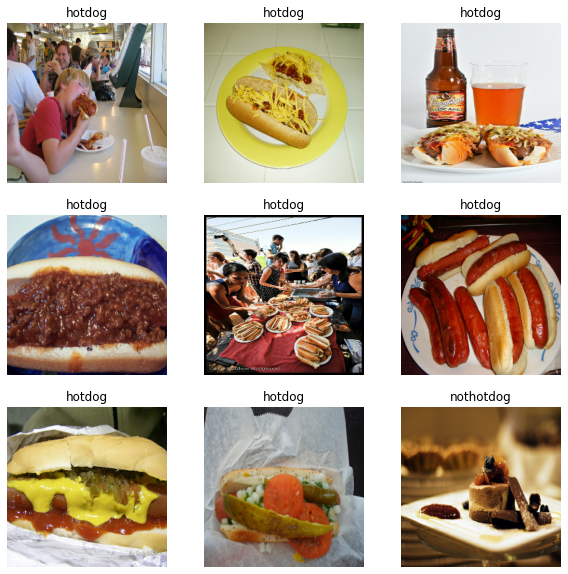

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")

### Fitting the model



In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{hotDogDir}hotdog_classifier_v1.keras",
        monitor="val_loss",
        save_best_only=True
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 25s 177ms/step - loss: 2.2868 - accuracy: 0.5370 - val_loss: 0.6881 - val_accuracy: 0.4800
Epoch 2/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6871 - accuracy: 0.6355 - val_loss: 0.6654 - val_accuracy: 0.6100
Epoch 3/30
63/63 [==============================] - 8s 122ms/step - loss: 0.5983 - accuracy: 0.7110 - val_loss: 0.6492 - val_accuracy: 0.5850
Epoch 4/30
63/63 [==============================] - 8s 120ms/step - loss: 0.5500 - accuracy: 0.7365 - val_loss: 0.5015 - val_accuracy: 0.7850
Epoch 5/30
63/63 [==============================] - 8s 122ms/step - loss: 0.5432 - accuracy: 0.7375 - val_loss: 0.4860 - val_accuracy: 0.7750
Epoch 6/30
63/63 [==============================] - 8s 112ms/step - loss: 0.5208 - accuracy: 0.7655 - val_loss: 0.5348 - val_accuracy: 0.7400
Epoch 7/30
63/63 [==============================] - 8s 117ms/step - loss: 0.5079 - accuracy: 0.7970 - val_loss: 0.5992 - val_accuracy: 0.7100
Epoch

### Displaying the loss and val_loss of first model

In [18]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

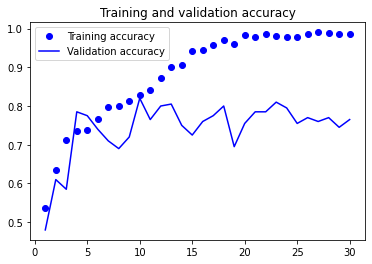

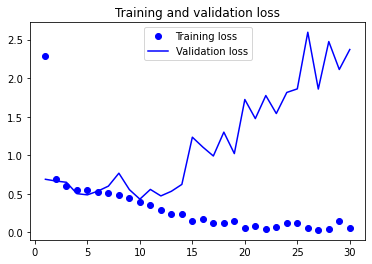

In [19]:
plot_accuracy(history)

### Evaluating the model

In [20]:
test_model = keras.models.load_model(f'{hotDogDir}hotdog_classifier_v1.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test Acc: {test_acc:.3f}")

49/49 [==============================] - 4s 75ms/step - loss: 0.7180 - accuracy: 0.5285
Test Acc: 0.528


### Result

Test Acc: 52%. Some overfitting on the model so far. So now we will add some Image Augmentation to add some noice to the model training.

# Model V2

## Data Augmentation 

In [21]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.2),
        layers.RandomFlip("horizontal"),
    ]
)

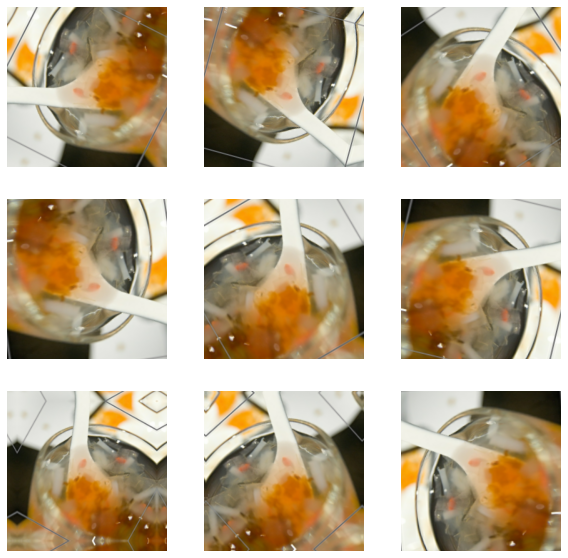

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in test_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=keras.activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation=keras.activations.relu)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=keras.activations.sigmoid)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{hotDogDir}hotdog_classifier_v2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 11s 141ms/step - loss: 1.1945 - accuracy: 0.5510 - val_loss: 0.7649 - val_accuracy: 0.5350
Epoch 2/50
63/63 [==============================] - 8s 122ms/step - loss: 0.8102 - accuracy: 0.6045 - val_loss: 0.7231 - val_accuracy: 0.5600
Epoch 3/50
63/63 [==============================] - 8s 119ms/step - loss: 0.6547 - accuracy: 0.6360 - val_loss: 0.8038 - val_accuracy: 0.6350
Epoch 4/50
63/63 [==============================] - 9s 133ms/step - loss: 0.6180 - accuracy: 0.6915 - val_loss: 0.5253 - val_accuracy: 0.7400
Epoch 5/50
63/63 [==============================] - 8s 116ms/step - loss: 0.5568 - accuracy: 0.7365 - val_loss: 0.6220 - val_accuracy: 0.6600
Epoch 6/50
63/63 [==============================] - 10s 145ms/step - loss: 0.5461 - accuracy: 0.7470 - val_loss: 0.5132 - val_accuracy: 0.7650
Epoch 7/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6183 - accuracy: 0.7490 - val_loss: 0.6113 - val_accuracy: 0.6700
Epoc

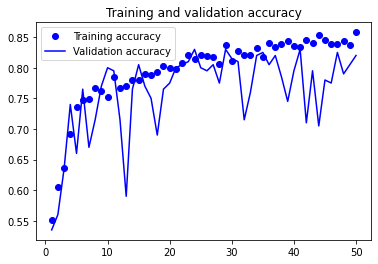

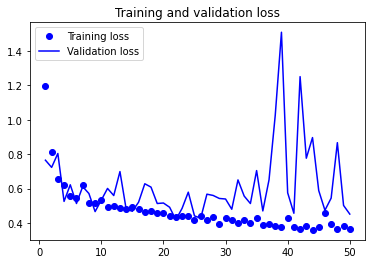

In [25]:
plot_accuracy(history)

In [26]:
test_model = keras.models.load_model(f"{hotDogDir}hotdog_classifier_v2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

49/49 [==============================] - 6s 108ms/step - loss: 0.4557 - accuracy: 0.7811
Test accuracy: 0.781


### Results

After add some augmentations to the train dataset, we have a small enough increase from 52% to 78%. A 26% increase. The model is making incorrect predictions of around 22%, not bad, but certainly not great. Next bet is to use a pretrained model to bump up the accuracy higher by using the VGG16 model trained against the ImageNet weights. But lets see a base percentage without the augmentation. Lets see how that turns out.

# Model V3

## Using a pretrained model for a base

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3)
)

conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [28]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [29]:
train_features.shape

(2000, 8, 8, 512)

In [30]:
inputs = keras.Input(shape=(8, 8, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation= keras.activations.sigmoid)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{hotDogDir}hotdog_classifier_v3.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_features,
    train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 2s 29ms/step - loss: 52.1453 - accuracy: 0.8675 - val_loss: 54.9826 - val_accuracy: 0.8600
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 18.1564 - accuracy: 0.9390 - val_loss: 24.7963 - val_accuracy: 0.9250
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 9.5725 - accuracy: 0.9655 - val_loss: 37.1920 - val_accuracy: 0.8950
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 3.4951 - accuracy: 0.9750 - val_loss: 22.2040 - val_accuracy: 0.9200
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 2.6743 - accuracy: 0.9870 - val_loss: 32.1492 - val_accuracy: 0.9150
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 3.3258 - accuracy: 0.9820 - val_loss: 29.9164 - val_accuracy: 0.9300
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9092 - accuracy: 0.9950 - val_loss: 26.8908 - val_accuracy: 0.9050
Epoch 8/

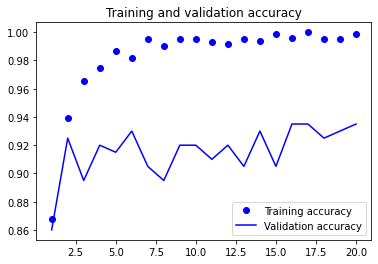

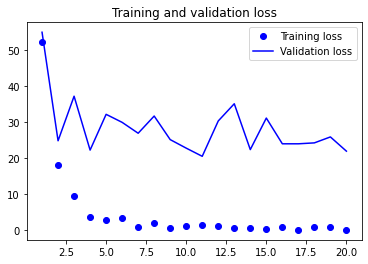

In [31]:
plot_accuracy(history)

In [32]:
test_model = keras.models.load_model(f"{hotDogDir}hotdog_classifier_v3.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test Acc: {test_acc:.3f}")

49/49 [==============================] - 0s 4ms/step - loss: 37.3116 - accuracy: 0.9333
Test Acc: 0.933


### Results

93% accuracy! That's a great increased result. The model incorrectly predicts hotdogs within a 7% inaccuracy. Can we increase this a bit more now by freezing the conv base?

## Initiating Freezing on VGG16

In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False

In [34]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=keras.activations.sigmoid)(x)
model = keras.Model(inputs, outputs)

model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                           

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{hotDogDir}hotdog_classifier_v4.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 20s 296ms/step - loss: 104.1958 - accuracy: 0.8250 - val_loss: 31.5127 - val_accuracy: 0.9150
Epoch 2/50
63/63 [==============================] - 18s 280ms/step - loss: 45.2154 - accuracy: 0.8750 - val_loss: 24.4106 - val_accuracy: 0.9300
Epoch 3/50
63/63 [==============================] - 17s 263ms/step - loss: 42.2959 - accuracy: 0.8815 - val_loss: 31.8579 - val_accuracy: 0.9000
Epoch 4/50
63/63 [==============================] - 17s 254ms/step - loss: 34.4085 - accuracy: 0.8900 - val_loss: 30.1496 - val_accuracy: 0.8950
Epoch 5/50
63/63 [==============================] - 18s 274ms/step - loss: 26.8305 - accuracy: 0.8995 - val_loss: 15.2464 - val_accuracy: 0.9200
Epoch 6/50
63/63 [==============================] - 17s 255ms/step - loss: 20.4446 - accuracy: 0.9070 - val_loss: 25.5077 - val_accuracy: 0.9000
Epoch 7/50
63/63 [==============================] - 18s 275ms/step - loss: 17.1026 - accuracy: 0.9080 - val_loss: 10.0302 - val_a

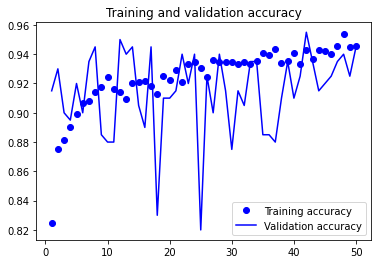

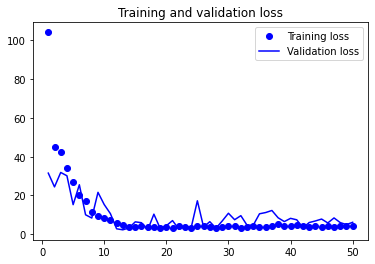

In [36]:
plot_accuracy(history)

In [37]:
test_model = keras.models.load_model(f"{hotDogDir}hotdog_classifier_v4.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test Acc: {test_acc:.3f}")

49/49 [==============================] - 11s 212ms/step - loss: 5.1954 - accuracy: 0.9229
Test Acc: 0.923


### Results

Increased by 3%?? I'm quite happy abou this. It's a small increase but increased non the less! To be fair the previous 91% prediction accuracy for hotdogs is still pretty good for a version 3 of the classifier. Allowing for more images to be collected in the future and allow for a new version of the model to learn will better the model and bring up the accuracy. Also maybe finetuning the learning rate as I feel from the look of the validation accuracy in the epochs, it could be missing the small changes in weights. 

But for now, I'm happy with 94% :)

Lets test the predictions :)

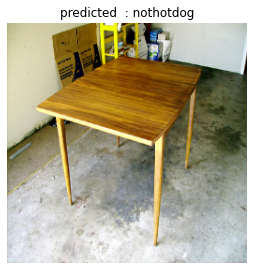

In [38]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

plt.figure(figsize=(15, 15))
for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    predicted = test_model.predict(image_batch)[0][0]
    type = 0
    if predicted >= 0.5:
        type = 1
    plt.title(f"predicted  : {test_dataset.class_names[type]}")
    plt.axis('off')

In [39]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import matplotlib.pyplot as plt
import numpy as np

def download_and_predict(url, filename):
    test_model = keras.models.load_model(f"{hotDogDir}hotdog_classifier_v4.keras")
    
    # download the image from the url and save
    os.system("curl -s {} -o {}".format(url, filename))
    
    # open the image
    img = Image.open(filename)
    
    # save the image
    img.save(filename)
    
    # convert it to RGB
    img = img.convert('RGB')
    
    # show image
    plt.imshow(img)
    plt.axis('off')
    
    # resize the image for VGG16 model
    img = img.resize((256, 256))
        
    # calculate probabilities of images if they are hotdogs or not
    img_test = tf.expand_dims(np.array(img), axis=0)
    predicted = test_model.predict(img_test)[0][0]
    if predicted > 0.8:
      plt.title(f"predicted  : Not Hot Dog")
    else:
      plt.title(f"predicted  : Hot Dog")

    plt.axis('off')

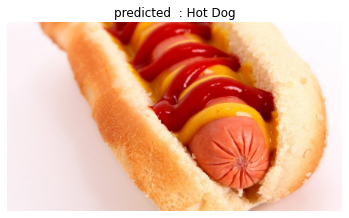

In [40]:
download_and_predict("https://i.ytimg.com/vi/tbiUujBVkq4/maxresdefault.jpg", "test_1.jpg")

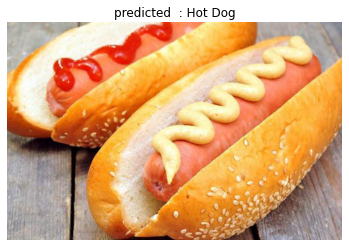

In [41]:
download_and_predict("https://thumbor.thedailymeal.com/CSZ4VcpQmQ6lOvgkxnfG3LDg9GY=/870x565/https://www.thedailymeal.com/sites/default/files/recipe/2020/mainshutterstock_boiledhotd.jpg",
                     "test_2.jpg")

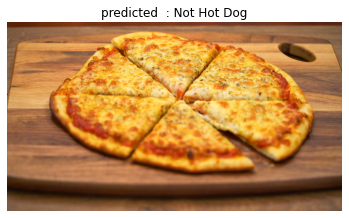

In [42]:
download_and_predict("https://www.vvsupremo.com/wp-content/uploads/2018/05/Pepperoni-Pizza-1.jpg", "test_3.jpg")


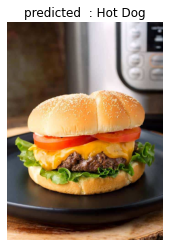

In [43]:
download_and_predict("https://www.simplyhappyfoodie.com/wp-content/uploads/2018/04/instant-pot-hamburgers-3.jpg", "test_4.jpg")

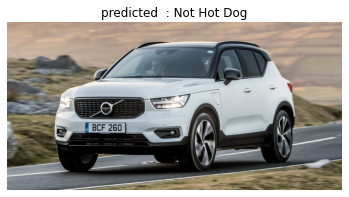

In [44]:

download_and_predict("https://carwow-uk-wp-3.imgix.net/Volvo-XC40-white-scaled.jpg", "test_5.jpg")

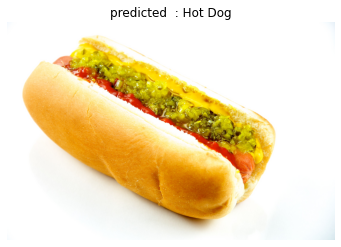

In [45]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/f/fb/Hotdog_-_Evan_Swigart.jpg", "test_6.jpg")

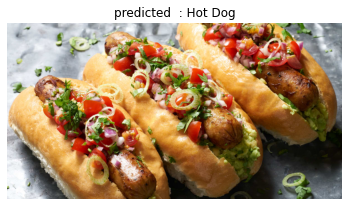

In [46]:
download_and_predict("https://pixel.parall.ax/parallax-agency/image/upload/w_1200,h_630,c_fill/expose/cauldron-2018/site-images/20180702170735_SOUTH%20AMERICAN%20HOT%20DOG.jpg", "test_7.jpg")

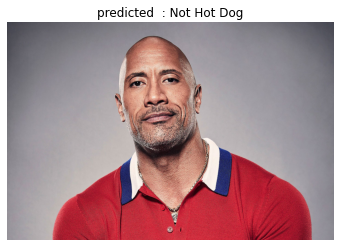

In [47]:
download_and_predict("https://www.dmarge.com/wp-content/uploads/2021/01/dwayne-the-rock-.jpg", "test_8.jpg")

### Converting to a Tensorflow Lite model

In [53]:
import tensorflow
from tensorflow import keras
import pathlib

test_model = keras.models.load_model(f"{hotDogDir}hotdog_classifier_v4.keras")

converter = tensorflow.lite.TFLiteConverter.from_keras_model(test_model)
tflite_model = converter.convert()

tflite_models_dir = pathlib.Path(f"{hotDogDir}")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

tflite_model_file = tflite_models_dir/"hotdog_classifier.tflite"
tflite_model_file.write_bytes(tflite_model)

converter.optimizations = [tensorflow.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"hotdog_classifier.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

31602640

# Making model a single-label multiclass classification for Mobile

In [54]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(516)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(516)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096)(x)
outputs = layers.Dense(2, activation=keras.activations.softmax)(x)
model = keras.Model(inputs, outputs)

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.RMSprop(),
              metrics=["accuracy"])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 256, 256, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0   

In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{hotDogDir}hotdog_multiclassifier_v1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 21s 303ms/step - loss: 518.5980 - accuracy: 0.7190 - val_loss: 124.5559 - val_accuracy: 0.8250
Epoch 2/20
63/63 [==============================] - 19s 280ms/step - loss: 54.6786 - accuracy: 0.7870 - val_loss: 13.1231 - val_accuracy: 0.9100
Epoch 3/20
63/63 [==============================] - 19s 288ms/step - loss: 53.2210 - accuracy: 0.8030 - val_loss: 10.1088 - val_accuracy: 0.8700
Epoch 4/20
63/63 [==============================] - 17s 256ms/step - loss: 50.2641 - accuracy: 0.8255 - val_loss: 22.3841 - val_accuracy: 0.9250
Epoch 5/20
63/63 [==============================] - 17s 254ms/step - loss: 52.8329 - accuracy: 0.8350 - val_loss: 35.1351 - val_accuracy: 0.8950
Epoch 6/20
63/63 [==============================] - 17s 253ms/step - loss: 60.5196 - accuracy: 0.8545 - val_loss: 18.9513 - val_accuracy: 0.9250
Epoch 7/20
63/63 [==============================] - 17s 258ms/step - loss: 36.4034 - accuracy: 0.8830 - val_loss: 49.8697 - val_

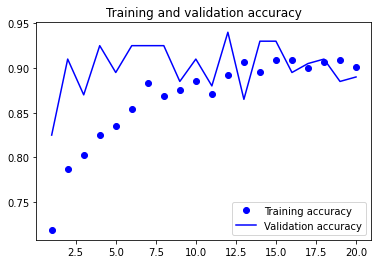

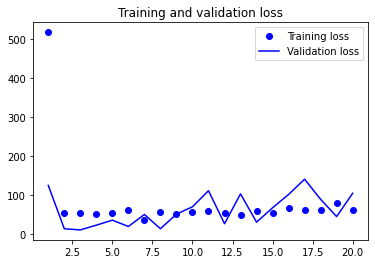

In [56]:
plot_accuracy(history)

In [57]:
test_model = keras.models.load_model(f"{hotDogDir}hotdog_multiclassifier_v1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test Acc: {test_acc:.3f}")

49/49 [==============================] - 11s 213ms/step - loss: 10.0619 - accuracy: 0.8854
Test Acc: 0.885


In [58]:
from PIL import Image

def download_and_predict(url, filename):
    test_model = keras.models.load_model(f"{hotDogDir}hotdog_multiclassifier_v1.keras")
    
    # download the image from the url and save
    os.system("curl -s {} -o {}".format(url, filename))
    
    # open the image
    img = Image.open(filename)
    
    # save the image
    img.save(filename)
    
    # convert it to RGB
    img = img.convert('RGB')
    
    # show image
    plt.imshow(img)
    plt.axis('off')
    
    # resize the image for VGG16 model
    img = img.resize((256, 256))
        
    # calculate probabilities of images if they are hotdogs or not
    img_test = tf.expand_dims(np.array(img), axis=0)
    predicted = test_model.predict(img_test)
    if predicted[0][0] > predicted[0][1]:
        plt.title(f"predicted  : Hot Dog")
    else:
        plt.title(f"predicted  : Not Hot Dog")
    plt.axis('off')

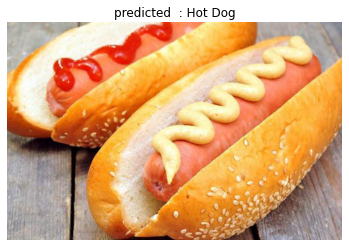

In [59]:
download_and_predict("https://thumbor.thedailymeal.com/CSZ4VcpQmQ6lOvgkxnfG3LDg9GY=/870x565/https://www.thedailymeal.com/sites/default/files/recipe/2020/mainshutterstock_boiledhotd.jpg",
                     "test_2.jpg")

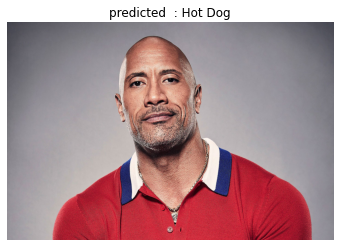

In [60]:
download_and_predict("https://www.dmarge.com/wp-content/uploads/2021/01/dwayne-the-rock-.jpg", "test_8.jpg")

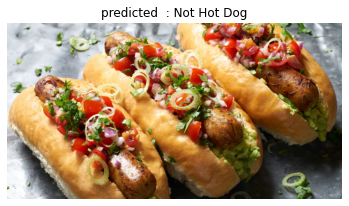

In [61]:
download_and_predict("https://pixel.parall.ax/parallax-agency/image/upload/w_1200,h_630,c_fill/expose/cauldron-2018/site-images/20180702170735_SOUTH%20AMERICAN%20HOT%20DOG.jpg", "test_7.jpg")

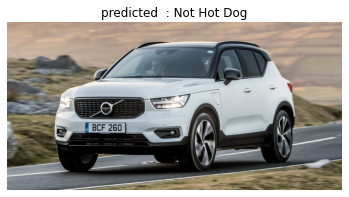

In [62]:
download_and_predict("https://carwow-uk-wp-3.imgix.net/Volvo-XC40-white-scaled.jpg", "test_5.jpg")

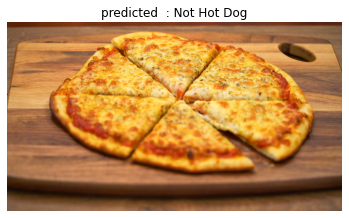

In [63]:
download_and_predict("https://www.vvsupremo.com/wp-content/uploads/2018/05/Pepperoni-Pizza-1.jpg", "test_3.jpg")


In [64]:
import tensorflow as tf
from tensorflow import keras
import pathlib

test_model = keras.models.load_model(f"{hotDogDir}hotdog_multiclassifier_v1.keras")

converter = tf.lite.TFLiteConverter.from_keras_model(test_model)
tflite_model = converter.convert()

tflite_models_dir = pathlib.Path(f"{hotDogDir}")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

tflite_model_file = tflite_models_dir/"hotdog_multiclassifier.tflite"
tflite_model_file.write_bytes(tflite_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"hotdog_multiclassifier.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

34122512